## Problems

### Key:

- __(w)__ indicates a __word__ problem
- __(f)__ indicates a __formula__ problem
- __(c)__ indicates a __computer__ problem
- __(t)__ indicates a __theoretical__ problem
- 😃 indicates the answer is available in the back

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm
sm.init_printing(use_latex='mathjax')

%matplotlib inline
# %matplotlib notebook is another option for interactive graphs

from IPython.core.display import HTML # Code to center plots on the screen
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Ideas for improvements:

- Replace dictionaries with [Counter dictionaries](https://docs.python.org/3.8/library/collections.html#collections.Counter)
    - 2.2, 2.7
- Replace for loop expressions (in estimating pdfs) with list comprehensions
    - 2.4-2.6

***
## Notes

- Code to simulate a __discrete__ random variable, $X$. Assume in general that the possible values of $X$ are $\{x_1, x_2,\dots, x_N\}$ with probabilities $\{p_1, p_2p\dots, x_N\}$, respectively. Let's assume $N=3$ and generate $M$ values of $X$, where $M$ denotes the number of __trials__. Original MATLAB code:

```MATLAB
for i=1:M
    u=rand(1,1);
    if u<=p1
        x(i,1)=x1;
    elseif u>p1 & u<=p1+p2
        x(i,1)=x2;
    elseif u>p1+p2
        x(i,1)=x3;
    end
end
```
- The __values__ of $X$ are termed the __outcomes__ or __realizations__ of $X$.


- To generate $M$ values from a [Gaussian distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), a __continuous__ random variable, we can use the MATLAB code:
```MATLAB
x=randn(M,1);
```

- A __PDF__, $p_X(x)$, may be estimated by first finding the [histogram](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html) and then dividing the number of outcomes in each bin by $M$, the total number of realizations, to obtain the probability. Moreover
$$
P[a \leq X \leq b] = \int_{a}^{b}{p_X(x)dx}
$$


- To determine $P[a \leq X \leq b]$ we generate $M$ realizations of $X$, then count the number of outcomes that fall into the $[a,b]$ interval and divide by $M$. Note that a large number of  realizations are needed to obtain accurate results.


- To obtain the __average__ (aka __mean__ or __expected value)__ of a random variable $X$ we'll use the **sample mean** estimate:

$$
\frac{1}{M}\sum_{i=1}^{M}{x_i}
$$

***
### 2.1😃  (c)
An experiment consists of tossing a fair coin twice. If a head occurs on the first toss, we let $x_1=1$ and if a tail occurs we let $x_1=0$. The same assignment is used for the outcome of $x_2$ of the second toss. Defining the random variable as $Y=X_1X_2$, estimate the probabilities for the different possible values of $Y$. Explain your results.

***
### 2.2 (c)
A pair of fair dice is tossed. Estimate the probability of "snake eyes" or a one for each die.

#### Answer:

The __relative frequency__ interpretation of the probability of observing "snake eyes" given $M$ repetitions of the experiment is given by

$$
P[D_1 + D_2 = 2] = \frac{\text{Number of times "snake eyes" observed}}{M}
$$

where $D_i$ is the result of rolling die $i$.

In [2]:
M = 1000
D1, D2, Y = np.zeros(M), np.zeros(M), np.zeros(M) 

# Initialize the set of outcomes and let the count start at 0
outcomes = {face:0 for face in range(2, 13)}

# Repeat M trials of the experiment
for i in range(M):
    D1[i] = np.random.randint(1,7) # Roll first die
    D2[i] = np.random.randint(1,7) # Roll second die
    Y[i] = D1[i] + D2[i]           # The sum of the dice for toss i 
    outcomes[Y[i]] += 1            # Increment the frequency counters
    
print(outcomes)

frequencies = outcomes.values()
probs = np.asarray([*frequencies]) / M
print('The probability of getting snake eyes is about {}%'.format(probs[0]*100))

{2: 22, 3: 48, 4: 76, 5: 91, 6: 145, 7: 164, 8: 164, 9: 110, 10: 88, 11: 52, 12: 40}
The probability of getting snake eyes is about 2.1999999999999997%


***
### 😃 2.3 (c) 

Estimate $P[-1\leq X\leq 1]$ if $X$ is a Gaussian random variable. Verify the results of your computer simulation by numerically evaluating the integral 

$$
\int_{-1}^{1}\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2} dx
$$

Hint: See Problem 1.14

#### Answer:

Remember: To determine $P[a \leq X \leq b]$ we generate $M$ realizations of $X$, then count the number of outcomes that fall into the $[a,b]$ interval and divide by $M$. Luckily, generating Gaussian random samples is easy.

In [3]:
# Number of trials
M = 10000

# Generate M values from the standard normal distribution
gvals = np.random.randn(M)

# Create a boolean mask of True=1 and False=0 values
interval_outcomes = (gvals >= -1) & (gvals <= 1)

# Sum the values (same as getting sum of just Trues) and divide by total
prob = np.sum(interval_outcomes) / M
prob

0.6802

Now let's verify our results through numerical integration rather than simulation (basically copy and pasting what we did in 1.14).

In [4]:
def g(n, dx):
    ''' Gaussian function for numerical integration 
    
    Args:
        n (int): integer along x-axis in [-3,3]
        dx (int): partition size
        
    Returns:
        (float): Value of Gaussian curve with given parameters
    '''
    return np.exp(-0.5*(n*dx)**2) / np.sqrt(2*np.pi)

In [5]:
dx = 0.01                  # partition size
L = int(np.round(1 / dx))  # Bounds of the sum
ns = np.arange(-L, L+1)    # integers along x-axis in [-L,L]

result = []
for n in ns:            # Loop over all integers in [-L,L]
    calc = g(n, dx)*dx  # Calculations for a particular n
    result.append(calc) # Store the value

sum(result)

0.6851051665234256

***
### 2.4 (c)

Estimate the PDF of the random variable

$$
X = \sum_{i=1}^{12}{\big(U_i - \frac{1}{2} \big)}
$$

where $U_i$ is a [uniform random variable](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html). Then, compare this PDF to the Gaussian PDF or 

$$
p_X(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}
$$

#### Answer

Remember that a __PDF__, $p_X(x)$, may be estimated by first finding the [histogram](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html) and then dividing the number of outcomes in each bin by $M$, the total number of realizations, to obtain the probability.

In [6]:
# Number of trials
M = 10000
X = np.zeros(M)

# Generate M realizations of X
for trial in range(M):
    # Generate one realization of X
    vals = []
    for i in range(1,13):
        # Generate a sample from the uniform distribution
        Ui = np.random.rand()
        vals.append(Ui - 0.5)
    X[trial] = sum(vals)

In [7]:
# Generate M values from the standard Gaussian distribution
G = np.random.randn(M)

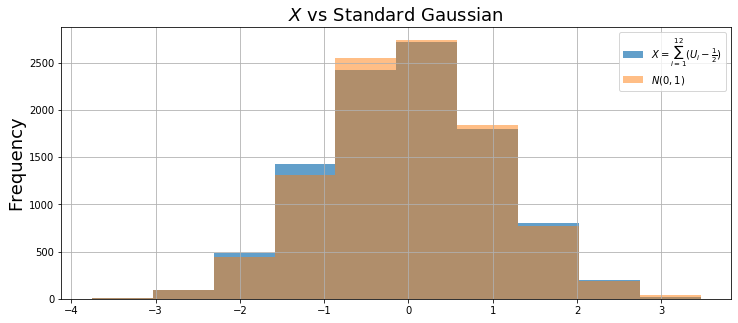

In [8]:
fig, ax = plt.subplots(figsize=(12,5))

# Returns the values of the histogram bins, the edges of the bins, and patches
nx, bins_x, px = plt.hist(X, label=r'$X = \sum_{i=1}^{12}{(U_i - \frac{1}{2})}$', alpha=0.7)
ng, bins_g, pg = plt.hist(G, bins=bins_x, label=r'$N(0,1)$', alpha=0.5)

# Tidy up the graph
plt.title(r'$X$ vs Standard Gaussian', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Sum the values of the histogram bins and divide by total
probs_X = nx / M
probs_G = ng / M

print('Estimated PDF of X:      {}'.format([*probs_X]))
print('Estimated PDF of N(0,1): {}'.format([*probs_G]))

Estimated PDF of X:      [0.0012, 0.0096, 0.0482, 0.1432, 0.2427, 0.2723, 0.1804, 0.0804, 0.0198, 0.0022]
Estimated PDF of N(0,1): [0.0012, 0.0096, 0.0441, 0.1309, 0.2553, 0.2744, 0.1838, 0.0775, 0.0187, 0.0038]


**Conclusion:** The standard normal (Gaussian) distribution is very well approximated by the random variable $X$.

***
### 2.5 (c)

Estimate the PDF of $X=U_1 - U_2$, where $U_1$ and $U_2$ are uniform random variables. What is the most proable range of values?

In [10]:
# Number of trials
M = 10000
X = np.zeros(M)

# Generate M realizations of X
for trial in range(M):
    # Generate two uniform random variables
    U1, U2 = np.random.rand(), np.random.rand()
    X[trial] = U1 - U2 # Generate one realization of X

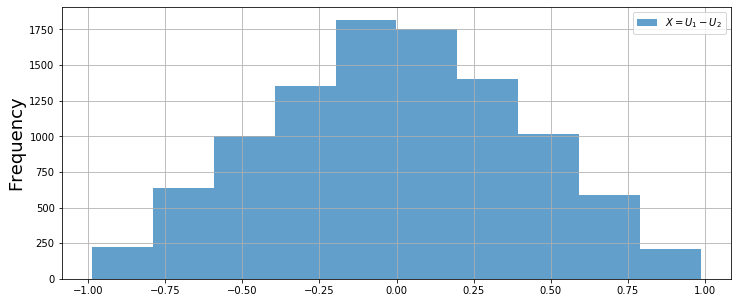

In [11]:
fig, ax = plt.subplots(figsize=(12,5))

# Returns the values of the histogram bins, the edges of the bins, and patches
nx, bins_x, px = plt.hist(X, label=r'$X = U_1 - U_2$', alpha=0.7)
plt.ylabel('Frequency', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Sum the values of the histogram bins and divide by total
probs_X = nx / M

print('Estimated PDF of X: {}'.format([*probs_X]))

Estimated PDF of X: [0.0221, 0.0638, 0.1001, 0.1354, 0.1817, 0.1756, 0.14, 0.1018, 0.0585, 0.021]


__Conclusion__: We see from the histogram that the range of approximately $[-\frac{1}{4},\frac{1}{4}]$ is the most probable range of values.

***
### 😃 2.6 (c)

Estimate the PDF of $X=U_1U_2$, where $U_1$ and $U_2$ are uniform random variables. What is the most proable range of values?

In [13]:
# Number of trials
M = 10000
X = np.zeros(M)

# Generate M realizations of X
for trial in range(M):
    # Generate two uniform random variables
    U1, U2 = np.random.rand(), np.random.rand()
    X[trial] = U1*U2 # Generate one realization of X

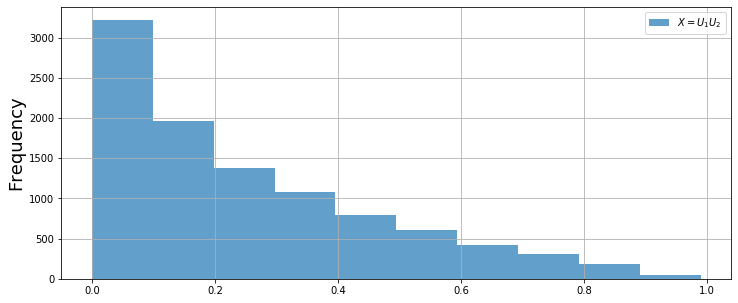

In [14]:
fig, ax = plt.subplots(figsize=(12,5))

# Returns the values of the histogram bins, the edges of the bins, and patches
nx, bins_x, px = plt.hist(X, label=r'$X = U_1U_2$', alpha=0.7)

plt.ylabel('Frequency', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

In [15]:
# Sum the values of the histogram bins and divide by total
probs_X = nx / M

print('Estimated PDF of X:      {}'.format([*probs_X]))

Estimated PDF of X:      [0.322, 0.1963, 0.1381, 0.1082, 0.0789, 0.0607, 0.0417, 0.0303, 0.0185, 0.0053]


**Conclusion:** We see from the histogram that the range of approximately $[0,0.1]$ is the most probable range of values.

***
### 2.7 (c)

Generate realizations of a discrete random variable $X$, which takes on values $1$, $2$, and $3$ with probabilities $p_1=0.1$, $p_2=0.2$, $p_3=0.7$, respectively. Next, based on the generated realizations, estimate the probabilities of obtaining the various values of $X$. 

#### Answer:

This problem seems well suited to using [`np.choice()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [16]:
trials = 1000
values = [1, 2, 3] 

# Initialize outcome counter
outcomes = {k:0 for k in range(1, 4)}

for i in range(trials):
    # Generate one realization 
    xi = np.random.choice(values, replace=True, p=[0.1, 0.2, 0.7])
    # Record the outcome in the frequency counter
    outcomes[xi] += 1 

print(outcomes)
    
frequencies = outcomes.values()
probs = np.asarray([*frequencies]) / trials
probs

{1: 107, 2: 198, 3: 695}


array([0.107, 0.198, 0.695])

***
### 😃 2.8 (c)

Estimate the mean of $U$, where $U$ is a uniform random variable. What is the true value?

#### Answer:

The uniform distribution exists within the interval $[0,1]$ such that every point is equiprobable. Thus, the mean is simply the average of the endpoints: $0.5$.

In [17]:
M = 1000
U = np.random.rand(M)

meanest = sum(U) / M
meanest

0.5012338043474034

***
### 2.9 (c)

Estimate the mean of $X+1$, where $X$ is a Gaussian random variable. What is the true value?

#### Answer:

(Linear Transformation) The mean of a standard Gaussian random variable is $0$, so if $Y=X+1$, then the mean of $Y$ should be $1$.

In [18]:
X = np.random.randn(M)
Y = X + 1

meanest = sum(Y) / M
meanest

0.978831245485538

***
### 2.10 (c)

Estimate the mean of $X^2$, where $X$ is a Gaussian random variable. 

#### Answer:

(Nonlinear Transformation)

In [19]:
X = np.random.randn(M)
Y = X**2

meanest = sum(Y) / M
meanest

1.045415333605119

***
### 😃 2.11 (c)

Estimate the mean of $2U$, where $U$ is a uniform random variable. What is the true value?

#### Answer:

(Linear Transformation) The mean of a Uniform random variable is $\frac{1}{2}$, so if $Y=2U$, then the mean of $Y$ should be $1$. 

In [20]:
U = np.random.rand(M)
Y = 2*U

meanest = sum(Y) / M
meanest

0.9928288035216891

***
### 2.12 (c)

It is conjectured that if $X_1$ and $X_2$ are Gaussian random variables, then by subtracting them (let $Y=X_1 - X_2$), the probable range of values should be smaller. Is this true?

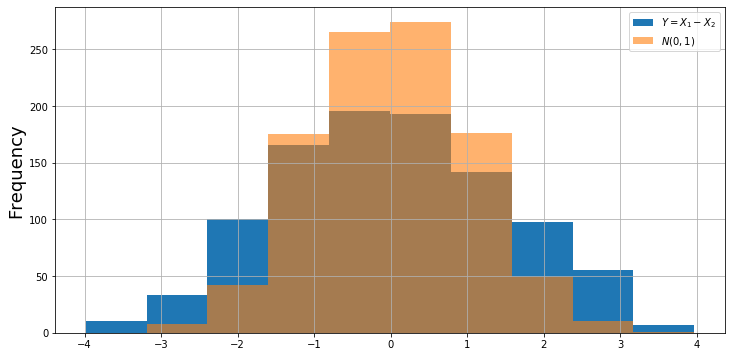

In [21]:
# Generate M trials of the random variables
X1, X2 = np.random.randn(M), np.random.randn(M)
Y = X1 - X2

fig, ax = plt.subplots(figsize=(12,6))

ny, binsy, py = plt.hist(Y, label=r'$Y=X_1-X_2$')
plt.hist(np.random.randn(M), bins=binsy, label=r'$N(0,1)$',alpha=0.6)

plt.ylabel('Frequency', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

__Conclusion:__

This doesn't appear to be true. The range of probable values of $Y$ seems to have increased because the curve has flattened. The frequency of occurances near the mean has dropped by about $\frac{1}{3}$ from the original standard Gaussian.

***
### 😃 2.13 (c)

A large circular dartboard is set up with a "bullseye" at the center of the circle, which is at the coordinate $(0,0)$. A dart is thrown at the center but lands at $(X,Y)$, where $X$ and $Y$ are two different Gaussian random variables. What is the average distance of the dart from the bullseye?

***
### 😃 2.14 (c)

It is conjectured that the mean of $\sqrt{U}$, where $U$ is a uniform random variable, is $\sqrt{ \text{mean of } U}$. Is this true?

#### Answer:

The mean of $U=\frac{1}{2}$ so the conjecture claims that the mean of $Y=\sqrt{U} = \sqrt{\frac{1}{2}} = \frac{\sqrt{2}}{2}\approx 0.707$. Based on the simulation and plot below, this conjecture seems false. The histogram of realizations of the means don't even come close to $0.707$.

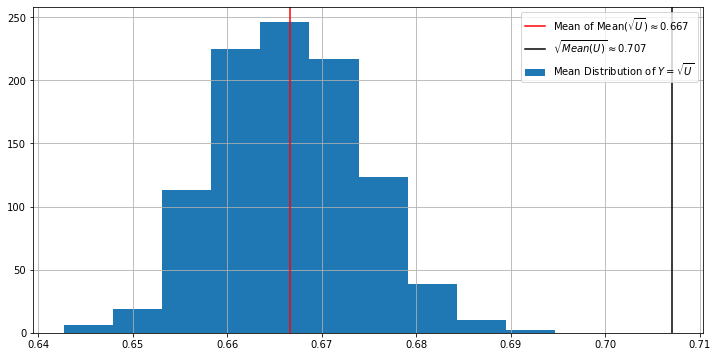

In [41]:
# The vector of means
meanest_y = np.zeros(M)

# Simulate M trials to see the distribution of means 
# (i.e. can we really trust that that wasn't an outlier before?)
for i in range(M):
    U = np.random.rand(M)
    Y = np.sqrt(U)
    meanest_y[i] = sum(Y) / M

# Get the mean of the mean distribution
meanest_mean = np.mean(meanest_y)
    
fig, ax = plt.subplots(figsize=(12,6))

plt.hist(meanest_y, 
         label=r'Mean Distribution of $Y=\sqrt{U}$')

plt.axvline(x=np.mean(meanest_y), 
            c='red', 
            label=r"Mean of Mean$(\sqrt{U})\approx$"+ str(np.round(meanest_mean,3)))

plt.axvline(x=np.sqrt(1/2), 
            c='k', 
            label=r'$\sqrt{Mean(U)} \approx 0.707$')

plt.grid(True)
plt.legend()
plt.show()

***
### 2.15 (c)

The Gaussian random variables $X_1$ and $X_2$ are linearly transformed to the new random variables

$$
\begin{equation}
    \begin{split}
        Y_1 &= X_1 + 0.1X_2 \\
        Y_2 &= X_1 + 0.2X_2
    \end{split}
\end{equation}
$$

Plot a scatter diagram for $Y_1$ and $Y_2$. Could you approximately determine the value of $Y_2$ if you knew that $Y_1=1$?

***
### 2.16 (c,w)

Generate a scatter diagram for the linearly transformed random variables

$$
\begin{equation}
    \begin{split}
        X_1 &= U_1 \\
        X_2 &= U_1 + U_2
    \end{split}
\end{equation}
$$

where $U_1$ and $U_2$ are uniform random variables. Can you explain why the scatter diagram looks like a parallelogram? Hint: Define the vectors

$$
\begin{equation}
    \begin{split}
        X &= \begin{bmatrix} X_1 \\ X_2 \end{bmatrix} \\
        e_1 &= \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\
        e_2 &= \begin{bmatrix} 0 \\ 1 \end{bmatrix}
    \end{split}
\end{equation}
$$

and express $X$ as a linear combination of $e_1$ and $e_2$.